<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# A simplistic approach to time series modeling

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-simplistic-approach-to-time-series-modeling" data-toc-modified-id="A-simplistic-approach-to-time-series-modeling-1">A simplistic approach to time series modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-stock-data" data-toc-modified-id="Load-the-stock-data-1.0.1">Load the stock data</a></span><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.0.1.1">Load the data</a></span></li><li><span><a href="#Sort-the-rows-by-Date-in-ascending-order" data-toc-modified-id="Sort-the-rows-by-Date-in-ascending-order-1.0.1.2">Sort the rows by <code>Date</code> in ascending order</a></span></li></ul></li><li><span><a href="#Make-the-Date-column-the-index-of-the-DataFrame." data-toc-modified-id="Make-the-Date-column-the-index-of-the-DataFrame.-1.0.2">Make the <code>Date</code> column the index of the DataFrame.</a></span></li><li><span><a href="#Predicting-price-developments" data-toc-modified-id="Predicting-price-developments-1.0.3">Predicting price developments</a></span><ul class="toc-item"><li><span><a href="#Create-the-data-frame" data-toc-modified-id="Create-the-data-frame-1.0.3.1">Create the data frame</a></span></li><li><span><a href="#Drop-missing-values" data-toc-modified-id="Drop-missing-values-1.0.3.2">Drop missing values</a></span></li><li><span><a href="#Look-at-correlations-between-the-variables" data-toc-modified-id="Look-at-correlations-between-the-variables-1.0.3.3">Look at correlations between the variables</a></span></li><li><span><a href="#Extract-the-outcome-variable" data-toc-modified-id="Extract-the-outcome-variable-1.0.3.4">Extract the outcome variable</a></span></li><li><span><a href="#Create-a-train-test" data-toc-modified-id="Create-a-train-test-1.0.3.5">Create a train-test</a></span></li><li><span><a href="#Fit-a-linear-regression-model-and-evaluate-it-on-the-train-and-test-set." data-toc-modified-id="Fit-a-linear-regression-model-and-evaluate-it-on-the-train-and-test-set.-1.0.3.6">Fit a linear regression model and evaluate it on the train and test set.</a></span></li><li><span><a href="#Obtain-the-prediction-for-the-train-and-test-set-and-plot-them-together-with-the-true-values." data-toc-modified-id="Obtain-the-prediction-for-the-train-and-test-set-and-plot-them-together-with-the-true-values.-1.0.3.7">Obtain the prediction for the train and test set and plot them together with the true values.</a></span></li><li><span><a href="#Fit-a-random-forest-model-instead.-Does-that-lead-to-an-improvement?" data-toc-modified-id="Fit-a-random-forest-model-instead.-Does-that-lead-to-an-improvement?-1.0.3.8">Fit a random forest model instead. Does that lead to an improvement?</a></span></li></ul></li><li><span><a href="#Fit-a-linear-regression-model-taking-additionally-the-prices-of-the-day-before-yesterday-as-predictors-into-account." data-toc-modified-id="Fit-a-linear-regression-model-taking-additionally-the-prices-of-the-day-before-yesterday-as-predictors-into-account.-1.0.4">Fit a linear regression model taking additionally the prices of the day before yesterday as predictors into account.</a></span></li><li><span><a href="#Fitting-a-classification-model" data-toc-modified-id="Fitting-a-classification-model-1.0.5">Fitting a classification model</a></span><ul class="toc-item"><li><span><a href="#Predict-rise-or-drop-with-yesterday's-close-price-and-today's-open-price." data-toc-modified-id="Predict-rise-or-drop-with-yesterday's-close-price-and-today's-open-price.-1.0.5.1">Predict rise or drop with yesterday's close price and today's open price.</a></span></li><li><span><a href="#Determine-the-baseline-for-the-model" data-toc-modified-id="Determine-the-baseline-for-the-model-1.0.5.2">Determine the baseline for the model</a></span></li><li><span><a href="#Create-a-train-test-split" data-toc-modified-id="Create-a-train-test-split-1.0.5.3">Create a train-test split</a></span></li><li><span><a href="#Fit-and-evaluate-a-logistic-regression-model." data-toc-modified-id="Fit-and-evaluate-a-logistic-regression-model.-1.0.5.4">Fit and evaluate a logistic regression model.</a></span></li><li><span><a href="#Fit-and-evaluate-a-random-forest-classifier." data-toc-modified-id="Fit-and-evaluate-a-random-forest-classifier.-1.0.5.5">Fit and evaluate a random forest classifier.</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the stock data

Which one you choose is up to you!

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

#### Load the data

In [149]:
df = pd.read_csv('../../../../resource-datasets/apple_stocks/aapl.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


#### Sort the rows by `Date` in ascending order

In [150]:
df.sort_values('Date',inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
250,2016-01-19,98.41,98.65,95.50,96.66,52841349
249,2016-01-20,95.10,98.19,93.42,96.79,72008265
248,2016-01-21,97.06,97.88,94.94,96.30,52054521
247,2016-01-22,98.63,101.46,98.37,101.42,65562769
246,2016-01-25,101.52,101.53,99.21,99.44,51196375


### Make the `Date` column the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in dataframe objects indexed by DateTime - literally Time Series!

In [151]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


### Predicting price developments

Let's create a simple predictive model for time series.
- As the outcome variable we take today's Close price. 
- As predictors we use yesterday's Close price and today's Open price. 

#### Create the data frame

Use `.shift()` to create a column containing yesterday's prices.

In [152]:
df['close_shifted'] = df.Close.shift()
df.head()

,Open,High,Low,Close,Volume,close_shifted
Date,,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349,NaN
2016-01-20,95.10,98.19,93.42,96.79,72008265,96.66
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42


#### Drop missing values

In [153]:
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,close_shifted
Date,,,,,,
2016-01-20,95.10,98.19,93.42,96.79,72008265,96.66
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42
2016-01-26,99.93,100.88,98.07,99.99,63538305,99.44


#### Look at correlations between the variables

In [154]:
df.corr()

,Open,High,Low,Close,Volume,close_shifted
Open,1.000000,0.995760,0.995511,0.991481,-0.274032,0.991689
High,0.995760,1.000000,0.995165,0.996495,-0.247793,0.988693
Low,0.995511,0.995165,1.000000,0.996161,-0.304791,0.987035
Close,0.991481,0.996495,0.996161,1.000000,-0.275868,0.983595
Volume,-0.274032,-0.247793,-0.304791,-0.275868,1.000000,-0.258565
close_shifted,0.991689,0.988693,0.987035,0.983595,-0.258565,1.000000


#### Extract the outcome variable

In [155]:
df2 = df.copy()

In [156]:
y, X = df2.pop('Close'), df2[['Open','close_shifted']]

#### Create a train-test

Make sure to split in the order of the dates.

In [157]:
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

#### Fit a linear regression model and evaluate it on the train and test set.

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lr = LinearRegression(n_jobs=2)
lr.fit(X_train, y_train)
print('cvs:', cross_val_score(lr, X_train, y_train, cv=5).mean())
print('test score:', lr.score(X_test, y_test))

cvs: 0.9050728058933031
test score: 0.9228342667731543


In [161]:
ts = TimeSeriesSplit(n_splits=3)
splits = [(tr, te) for (tr, te) in ts.split(X_train)]
splits

# we can't cross val normally with timeseries, we need to preserve the order of the data so we do this TimeSeries
# split which increase the folds until all training data is captured.
# Note = the te is same size for all 3 folds here, 

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
  array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
         66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
         83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
  array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 11

In [162]:
# then you can add in ts as cv parameter:
print('cvs:', cross_val_score(lr, X_train, y_train, cv=ts).mean())

cvs: 0.951809853804419


#### Obtain the prediction for the train and test set and plot them together with the true values.

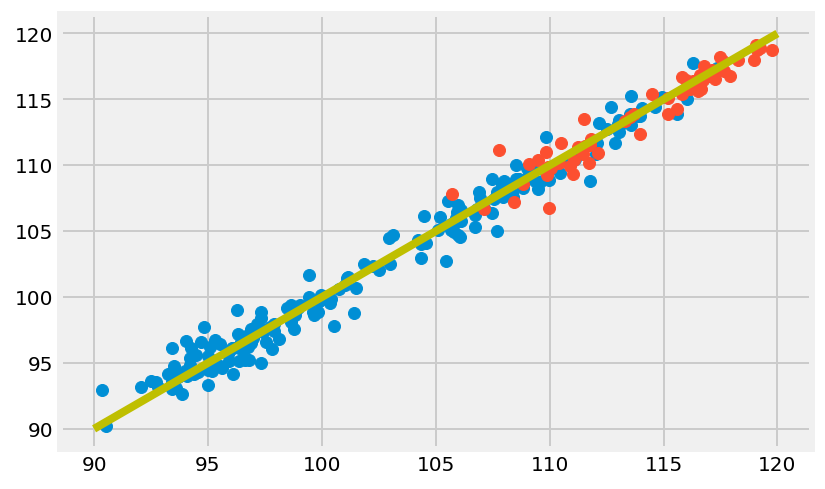

In [163]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

plt.scatter(x=y_train, y=pred_train)
plt.scatter(x=y_test, y=pred_test);

x = np.linspace(90,120)
plt.plot(x, x, c='y');

# nice and all, but for timeseries you care more about how true vs pred track each other over time.

/Users/Noah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


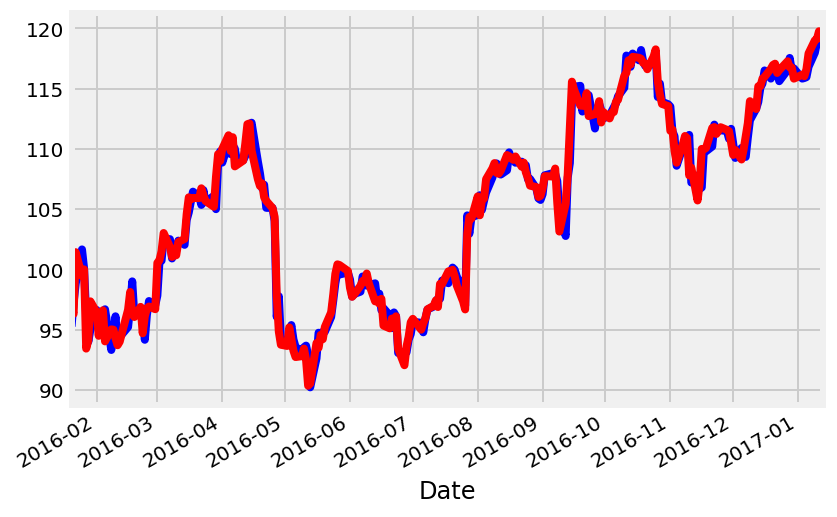

In [172]:
# so more like this is better... 

X['pred'] = np.concatenate([pred_train, pred_test])
X['pred'].plot(c='b')
y.plot(c='r');

#### Fit a random forest model instead. Does that lead to an improvement?

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print('cvs:', cross_val_score(rf, X_train, y_train, cv=5).mean())
print('test score:', rf.score(X_test, y_test))

cvs: 0.7256728464959763
test score: 0.8500283006348366


/Users/Noah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


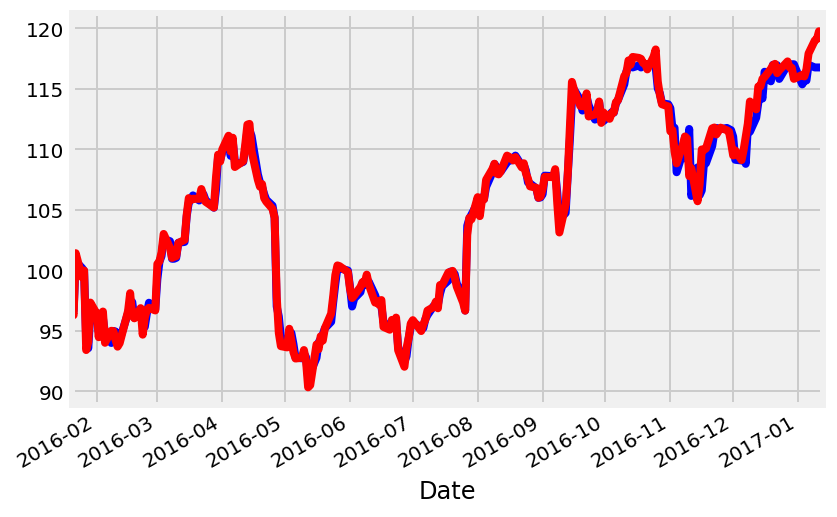

In [175]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

X['rf_pred'] = np.concatenate([rf_pred_train, rf_pred_test])
X['rf_pred'].plot(c='b')
y.plot(c='r');

# overfit to training data

### Fit a linear regression model taking additionally the prices of the day before yesterday as predictors into account.

In [176]:
df.rename(columns={'close_shifted':'close_1d'},inplace=True)
df['close_2d'] = df.close_1d.shift()
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Volume,close_1d,close_2d
Date,,,,,,,
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79,96.66
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30,96.79
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42,96.30
2016-01-26,99.93,100.88,98.07,99.99,63538305,99.44,101.42
2016-01-27,96.04,96.63,93.34,93.42,132224500,99.99,99.44


In [177]:
df2 = df.copy()
y, X = df2.pop('Close'), df2[['Open', 'close_1d', 'close_2d']]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [178]:
lr.fit(X_train, y_train)

# don't forget the TimeSeriesSplit:
ts = TimeSeriesSplit(n_splits=3)
ts.split(X_train)

print('cvs:', cross_val_score(lr, X_train, y_train, cv=ts).mean())
print('test score:', lr.score(X_test, y_test))

cvs: 0.9502607582643353
test score: 0.9228707214519133


/Users/Noah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


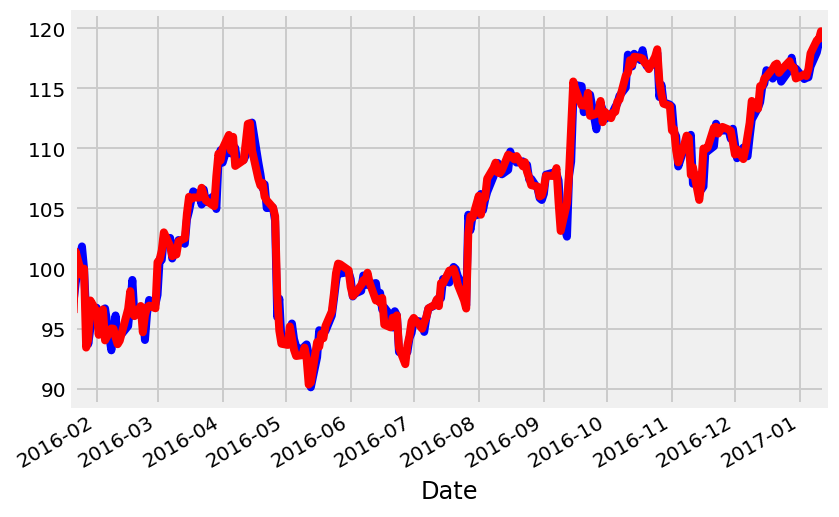

In [179]:
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

X['lr_pred'] = np.concatenate([lr_pred_train, lr_pred_test])
X['lr_pred'].plot(c='b')
y.plot(c='r');

### Fitting a classification model

Create a binary variable which indicates for consecutive days if the closing price rose or dropped.

In [180]:
df['Dir'] = df.apply(lambda x: 1 if (x['Close']-x['close_1d'])>0 else 0, axis=1)
df.head()

,Open,High,Low,Close,Volume,close_1d,close_2d,Dir
Date,,,,,,,,
2016-01-21,97.06,97.88,94.94,96.30,52054521,96.79,96.66,0
2016-01-22,98.63,101.46,98.37,101.42,65562769,96.30,96.79,1
2016-01-25,101.52,101.53,99.21,99.44,51196375,101.42,96.30,0
2016-01-26,99.93,100.88,98.07,99.99,63538305,99.44,101.42,1
2016-01-27,96.04,96.63,93.34,93.42,132224500,99.99,99.44,0


#### Predict rise or drop with yesterday's close price and today's open price.

In [181]:
df2 = df.copy()
y, X = df2.pop('Dir'), df2[['Open','close_1d']]

#### Determine the baseline for the model

In [182]:
print('Baseline:', y.value_counts(normalize=True).max())

Baseline: 0.5341365461847389


#### Create a train-test split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

#### Fit and evaluate a logistic regression model.

In [184]:
from sklearn.linear_model import LogisticRegression

In [186]:
lr = LogisticRegression(n_jobs=2)
lr.fit(X_train, y_train)
print('cvs:', cross_val_score(lr, X_train, y_train, cv=ts))
print('test score:', lr.score(X_test, y_test))

cvs: [0.69565217 0.65217391 0.7173913 ]
test score: 0.6825396825396826


In [107]:
from sklearn.metrics import classification_report, confusion_matrix

pred_test = lr.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_test, lr.classes_))
print()
print('Classification Report:')
print()
print(classification_report(y_test, pred_test))

Confusion Matrix:
[[25  6]
 [14 18]]

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        31
           1       0.75      0.56      0.64        32

    accuracy                           0.68        63
   macro avg       0.70      0.68      0.68        63
weighted avg       0.70      0.68      0.68        63



In [109]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [116]:
y_test_pp = pd.DataFrame(lr.predict_proba(X_test), columns=[['class_0_pp', 'class_1_pp']])
y_test_pp.head()

,class_0_pp,class_1_pp
0,0.167790,0.832210
1,0.595876,0.404124
2,0.240272,0.759728
3,0.563401,0.436599
4,0.579106,0.420894


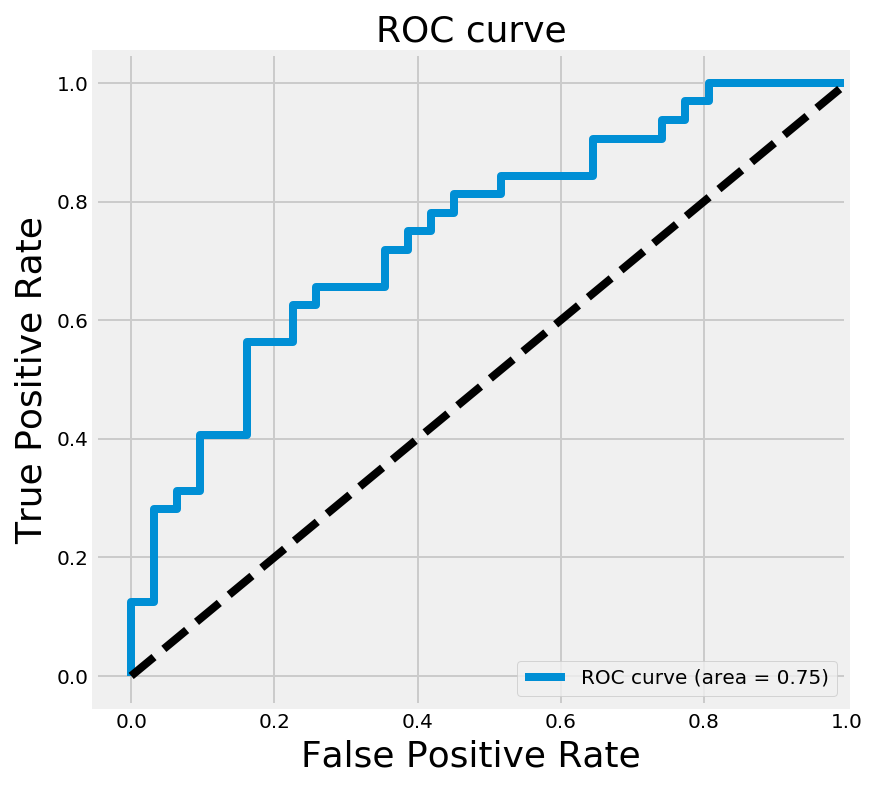

In [117]:
# For class 1, find the area under the curve
fpr, tpr, threshold = roc_curve(y_test, y_test_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Fit and evaluate a random forest classifier.

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('cvs:', cross_val_score(rf, X_train, y_train, cv=5).mean())
print('test score:', rf.score(X_test, y_test))

cvs: 0.4623044096728307
test score: 0.5079365079365079


In [124]:
pred_test = rf.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_test, rf.classes_))
print()
print('Classification Report:')
print()
print(classification_report(y_test, pred_test))

Confusion Matrix:
[[16 15]
 [16 16]]

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        31
           1       0.52      0.50      0.51        32

    accuracy                           0.51        63
   macro avg       0.51      0.51      0.51        63
weighted avg       0.51      0.51      0.51        63



In [ ]:
y_test_pp = pd.DataFrame(rf.predict_proba(X_test), columns=[['class_0_pp', 'class_1_pp']])
y_test_pp.head()